# BoomBikes ML Linear Regression Assignment

#### By Sheetal Atre

# Importing libraries

In [7]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from IPython.core.interactiveshell import InteractiveShell
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# from collections import defaultdicta
from sklearn.preprocessing import LabelEncoder


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

# Reading data

In [8]:
# display all cols
pd.set_option('display.max_columns', 500)

In [9]:
# read csv file and convert dteday to datatype = date 
df = pd.read_csv("day.csv")
df.head()

FileNotFoundError: [Errno 2] File day.csv does not exist: 'day.csv'

# Inspecting data

In [ ]:
# Inspect first 5 rows
df.head()

In [ ]:
# No of rows and columns
df.shape

In [ ]:
# Describe the numeric information
df.describe()

In [ ]:
# check columns nullable or not and also check dtype
df.info()

In [ ]:
# convert dteday from object to datetime64[ns]
df['dteday']=pd.to_datetime(df['dteday'])

In [ ]:
#Checking datatypes of all the columns
df.dtypes


In [ ]:
#confirm that no missing values
df.isnull().sum()

In [ ]:
#check if data in numerical cols follows normal distribution
df_numerical=df.select_dtypes(include=['float64','int64','datetime64'])
df_numerical.describe()

### Conclusion :
for all columns mean is almost same as median 
so all columns are normalized.

In [ ]:
# Create a dummy dataframe (copy of original bike df) for duplicate check
df_temp = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_temp.drop_duplicates(subset=None, inplace=True)

print(df_temp.shape)
print(df.shape)
      


### Conclusion :
1. Dataset has 730 rows and 16 columns 

2. Datatypes:
    <br/>2.1 object/string=1 column
    <br/>2.2 date = 1 column
    <br/>2.3 float = 4 columns
    <br/>2.4 integer = 11 columns

3. All are non-null cols, so no missing values to handle

4. There are no duplicate records

5. There may be some categorical variables which are already converted to numeric format, we will not convert them further.


# Data Cleaning

In [ ]:
#drop column : instant
df.instant.describe()
df.drop('instant', axis=1, inplace=True)
# df.head()

### Conclusion:
We may drop instant col as it seems to be index of some kind, and of no importance in the model.

In [ ]:
#Rename the full form of column names for better understanding
new_col_names={'yr':'year',"dteday":'dateday','mnth':'month','hum':'humidity','cnt':'count'}
df.rename(columns = new_col_names, inplace = True) 
df.head()


### Conclusion:
Based on the high level look at the data and the data dictionary,
The following variables can be removed from further analysis: 
- instant : Its only an index value 
- dteday :  Since we already have seperate columns for 'year' & 'month'
   


In [ ]:
# # Convert numerical to categorical
# df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
# df['mm']=df['month']
# df['month']=df.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
# df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
# df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
# df.head()

In [ ]:
#Identify categorical and numerical columns
df.nunique().sort_values()

In [ ]:
df.info()

In [ ]:
bike_new=df[['season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'count']]

bike_new.info()

### Conclusion:
Data is for 2 years : 2018 and 2019.
Column Year shows 0 and 1 for 2018 and 2019, which is duplicate info of yyyy column. So we can drop Year column as it is easier to understand yyyy column. 

Rows for quarters:

    Q1 : 180
    Q2 : 244
    Q3 : 244
    Q4 : 62

In [ ]:
df.head()

# Inspect columns - holiday, weekday, workingday 

In [6]:
#   Check if any working days which are holidays
df1=df[ df.holiday == 1  ]
df1=df1.workingday == 0
len(df1)

NameError: name 'df' is not defined

In [ ]:
# check if weekday and holiday is repeated information
df1=df[ df.holiday == 1  ]
df1=df1[['dateday','holiday','weekday','workingday','count']]
df1

In [ ]:
#Inspect data around known public US holidays like July 4: Independence Day, January 15: Martin Luther King Jr.’s Birthday
display(df[df['dateday'] == '2019-01-15'])
display(df[df['dateday'] == '2018-01-15'])

display(df[df['dateday'] == '2019-07-04'])
display(df[df['dateday'] == '2018-07-04'])

display(df[df['dateday'] == '2019-07-05'])
display(df[df['dateday'] == '2018-07-05'])


### Conclusion :

There are no holidays on working days 

Holidays are marked for all weekends, hence we can keep either of these columns since the repeated info will impact our model adversely.

Even during holidays, there are bookings.

Around holidays there are high bookings count, 

For eg : holiday list of 2018:
    - Monday, January 1, 2018: New Year’s Day
    - Monday, January 15, 2018: Martin Luther King Jr.’s Birthday
    - Monday, February 19, 2018: Washington’s Birthday
    - Monday, April 16, 2018: DC Emancipation Day
    - Monday, May 28, 2018: Memorial Day
    - Wednesday, July 4, 2018: Independence Day
    - Monday, September 3, 2018: Labor Day
    - Monday, October 8, 2018: Columbus Day
    - Monday, November 12, 2018: Veterans Day*
    - Thursday, November 22, 2018: Thanksgiving Day
    - Tuesday, December 25, 2018: Christmas Day


In [ ]:
df.columns


In [ ]:
# # Registered Vs Casual user ratio


df_rc_ratio=df[['registered','casual','dateday']]
df_rc_ratio['rc_ratio']=round((df['registered']/df['casual']),1)
df_rc_ratio['year_month']= df_rc_ratio['dateday'].apply(lambda x: x.strftime('%y%m')) 
# display(df_rc_ratio.describe())

plt.figure(figsize=(32, 12))
plt.subplot(2,1,1)
plt.scatter(x=df_rc_ratio['year_month'],y=df_rc_ratio['rc_ratio'])
plt.title('Registered Vs Casual user ratio')
plt.show()


df_cat=pd.DataFrame(df[['registered','dateday']])
df_cat['year_month']= df_cat['dateday'].apply(lambda x: int(x.strftime('%y%m'))) 
df_reg= pd.DataFrame(df_cat.groupby(['year_month'])['registered'].sum())
df_reg.reset_index(inplace=True)
df_reg['registered']=round(df_reg['registered']/1000,2)
# display(df_reg.head())

fig, ax = plt.subplots(1,1, figsize=(40,10))
sns.set(font_scale=1.5)
ax=sns.barplot(x='year_month',y='registered',data=df_reg)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')
plt.title('Monthwise registrations')
plt.show()



df_cat=pd.DataFrame(df[['casual','dateday']])
df_cat['year_month']= df_cat['dateday'].apply(lambda x: int(x.strftime('%y%m'))) 
df_casual= pd.DataFrame(df_cat.groupby(['year_month'])['casual'].sum())
df_casual.reset_index(inplace=True)
df_casual['casual']=round(df_casual['casual']/1000,2)
# display(df_cat1.head())

fig, ax1 = plt.subplots(1,1, figsize=(40,10))
sns.set(font_scale=1.5)
ax1=sns.barplot(x='year_month',y='casual',data=df_casual)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')
plt.title('Monthwise casual bookings')
plt.show()


### Conclusion:
Registered Vs Casual user ratio ranges from 1.0 to 74.9 with avg ratio being 7.7 and median being 5.7.
 max value is very high compared to mean and median. Few outliers seem to be present specially in Jan18 and Dec19 which will have to analyse further. Casual user bookings are higher during Sep and lowest in Dec and Jan.
 
 Registered users are higher in Dec-Jan than casual users which is as expected. Registered user count is quite consistent  more or less. Company may think of some loyalty packages/extra discounts on further investigating such users. Casual user count is low during Dec-Feb, so company can think of some family packages to attract more users.


In [ ]:
# #Feeling to Actual temperature ratio
# df_tempr_ratio=round(df['atemp']/df['temp'],1)
# df_tempr_ratio.describe()


df_tempr_ratio=df[['atemp','temp','dateday']]
df_tempr_ratio['tempr_ratio']=round((df['atemp']/df['temp']),1)
df_tempr_ratio['year_month']= df_tempr_ratio['dateday'].apply(lambda x: x.strftime('%y%m')) 

display(df_tempr_ratio.describe())

plt.figure(figsize=(32, 12))

plt.subplot(2,1,1)
plt.scatter(x=df_tempr_ratio['year_month'],y=df_tempr_ratio['tempr_ratio'])
plt.title('Feeling Temperature to Actual Temperature ratio')
plt.show()


### Conclusion:
Feeling to Actual temperature ratio ranges from 0.4 to 1.2 with avg ratio being 1.17 and median being 1.2
Max value, Mean and median seem to be quite close values. No outliers present.

In [ ]:
# #Weather Comfort Index gives suitability of environmental conditions to physical activity.
# # Formula : Comfort Index = (temperature + relative humidity)/4.

# df_wci=(df['atemp']+df['humidity'])/4
# df_wci.describe()



df_wci=df[['atemp','temp','dateday','count']]
df_wci['wci']=round((df['atemp']+df['humidity'])/4,2)
df_wci['year_month']= df_wci['dateday'].apply(lambda x: x.strftime('%y%m')) 

# display(df_wci.describe())
 
sns.set(font_scale=2)
fig,ax = plt.subplots(1, 2,figsize = (30,12))
ax[0] =sns.boxplot(x='year_month',y='wci',data=df_wci,ax=ax[0])
ax[0].set_title('WCI-Before outlier handling', fontsize=14)
ax[0].set(xlabel='year_month', ylabel='wci')
for item in ([ ax[0].xaxis.label, ax[0].yaxis.label] +
             ax[0].get_xticklabels() + ax[0].get_yticklabels()):
    item.set_fontsize(14)
    
# # drop outliers
# print(df_wci.shape)
df_wci=df_wci[df_wci.wci>10]
# print(df_wci.shape)
# df_wci.wci.describe()

ax[1] =sns.boxplot(x='year_month',y='wci',data=df_wci,ax=ax[1])
ax[1].set_title('WCI-After outlier handling', fontsize=14)
ax[1].set(xlabel='year_month', ylabel='wci')
for item in ([ ax[1].xaxis.label, ax[1].yaxis.label] +
             ax[1].get_xticklabels() + ax[1].get_yticklabels()):
    item.set_fontsize(14)
    
plt.show()

fig, ax1 = plt.subplots(1,1, figsize=(40,10))
sns.set(font_scale=1.5)
plt.scatter(x=df_wci['year_month'],y=df_wci['wci'])
ax1.set_title('Weather Comfort Index = (temperature + relative humidity)/4', fontsize=14)



### Conclusion:

Below columns contain few outliers which we can analyse and remove :
    - tempr_ratio : range=1.0-1.2, med=0.1 - 17 
    outlier records with values >1.2, and values < 0.5. We can inspect and remove these records on inspection.
    - wci : range=20-35,med=22,
    outlier records with values < 10, we can inspect and remove these records.
    - rc_ratio: range=0-5,med=5
    outliers>20
  

### Conclusion:
Weather Comfort Index ranges from 4.82 to 30.83 with avg ratio being 21.62 and median being 22.13
Mean and median seem to be quite close values. 

No outliers  present.

# Check for garbage values

In [ ]:
# Check for garbage values in catgorical columns:
print(df.columns)
categorical_cols=['dateday','season','month','weekday','weathersit','year','holiday','workingday']

categorical_cols.append('year')
categorical_cols.append('month')
# categorical_cols.append('qtr')

for col in categorical_cols:
    print(df[col].value_counts(), '\n')

numerical_cols=['temp','humidity','casual','windspeed','registered','atemp','count'] 
numerical_cols.append('rc_ratio')
numerical_cols.append('tempr_ratio')
numerical_cols.append('wci')

# Check if garbage values exist in numerical columns:
df.describe()




### Conclusion :
We are considering the columns having less than 20 distinct values as categorical. We will have to analyse and decide whether to convert them to categorical or treat as integer. 

No garbage values in categorical columns and numerical columns 



In [ ]:
#Convert numerical to categorical:
df_cat=pd.DataFrame(df[['season','dateday','count']])
df_cat['season']=df_cat.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter' })
df_cat['year_month']= df_cat['dateday'].apply(lambda x: int(x.strftime('%y%m'))) 
df_cat1= pd.DataFrame(df_cat.groupby(['season','year_month'])['count'].sum())
df_cat1.reset_index(inplace=True)
df_cat1['count']=round(df['count']/1000,2)
# display(df_cat1.head())

fig, ax = plt.subplots(1,1, figsize=(40,10))
sns.set(font_scale=1.5)
ax=sns.barplot(x='year_month',y='count',hue='season',data=df_cat1)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')
plt.title('Monthwise season bookings (in thousands)')
plt.show()


### Conclusion:
High counts observed in year 2018 from months Mar to Sep, peaking around May and June. In 2019 high counts observed in months of Sep  and Oct.

In [ ]:
df_cat=pd.DataFrame(df[['weathersit','dateday','count']])
df_cat['year_month']= df_cat['dateday'].apply(lambda x: int(x.strftime('%y%m'))) 
df_cat.weathersit.value_counts()
df_weathersit= pd.DataFrame(df_cat.groupby(['weathersit','year_month'])['count'].sum())
df_weathersit.reset_index(inplace=True)
df_weathersit['weathersit']=df_weathersit.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df_weathersit['count']=round(df['count']/1000,2)
df_weathersit.head()

fig, ax1 = plt.subplots(1,1, figsize=(40,10))
sns.set(font_scale=1.5)
sns.barplot(x='year_month',y='count',hue='weathersit',data=df_weathersit,ax=ax1)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')
plt.title('Monthly weather situation wise bookings (in thousands)')
plt.show()

### Conclusion:
We can see high no of bookings between Dec-Feb in both years.
In these months bookings are high for all weather situations. It may be due to vacations. We will need to investigate the reason for this further.

We will need to inspect further if this was on clear days during the season or not. 


In [ ]:
# monthly  bookings comparison over the two years

df_cat=pd.DataFrame(df[['dateday','count']])
# df_cat['month']=df_cat.season.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df_cat['year_month']= df_cat['dateday'].apply(lambda x: int(x.strftime('%y%m'))) 
df_bookings= pd.DataFrame(df_cat.groupby(['year_month'])['count'].sum())
df_bookings.reset_index(inplace=True)
df_bookings['count']=round(df_bookings['count']/1000,2)


df_cat=pd.DataFrame(df[['season','dateday','count']])
df_cat['season']=df_cat.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df_cat['year_month']= df_cat['dateday'].apply(lambda x: int(x.strftime('%y%m'))) 
df_season= pd.DataFrame(df_cat.groupby(['season','year_month'])['count'].sum())
df_season.reset_index(inplace=True)
df_season['count']=round(df_season['count']/1000,2)
# display(df_cat1.head())

df_cat=pd.DataFrame(df[['weathersit','dateday','count']])
df_cat['year_month']= df_cat['dateday'].apply(lambda x: int(x.strftime('%y%m'))) 
df_cat.weathersit.value_counts()
df_weathersit= pd.DataFrame(df_cat.groupby(['weathersit','year_month'])['count'].sum())
df_weathersit.reset_index(inplace=True)
df_weathersit['weathersit']=df_weathersit.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df_weathersit['count']=round(df_weathersit['count']/1000,2)
df_weathersit.head()


df_cat=pd.DataFrame(df[['temp','dateday','count']])
df_cat['year_month']= df_cat['dateday'].apply(lambda x: int(x.strftime('%y%m'))) 
# df_cat.weathersit.value_counts()
df_temp= pd.DataFrame(df_cat.groupby(['temp','year_month']).mean())
df_temp.reset_index(inplace=True)
df_temp.head()


df_cat=pd.DataFrame(df[['atemp','dateday','count']])
df_cat['year_month']= df_cat['dateday'].apply(lambda x: int(x.strftime('%y%m'))) 
# df_cat.weathersit.value_counts()
df_atemp= pd.DataFrame(df_cat.groupby(['atemp','year_month']).mean())
df_atemp.reset_index(inplace=True)
df_atemp.head()


df_cat=pd.DataFrame(df[['humidity','dateday','count']])
df_cat['year_month']= df_cat['dateday'].apply(lambda x: int(x.strftime('%y%m'))) 
# df_cat.weathersit.value_counts()
df_humidity= pd.DataFrame(df_cat.groupby(['humidity','year_month']).mean())
df_humidity.reset_index(inplace=True)
df_humidity.head()


df_cat=pd.DataFrame(df[['windspeed','dateday','count']])
df_cat['year_month']= df_cat['dateday'].apply(lambda x: int(x.strftime('%y%m'))) 
# df_cat.weathersit.value_counts()
df_windspeed= pd.DataFrame(df_cat.groupby(['windspeed','year_month']).mean())
df_windspeed.reset_index(inplace=True)
df_windspeed.head()



sns.color_palette("Set2")
fig, ax0 = plt.subplots(1,1, figsize=(40,5))
sns.set(font_scale=1.5)
sns.barplot(x='year_month',y='count',data=df_season,ax=ax0,palette = "Set2")
ax0.set( ylabel = "bookings")

fig, ax1 = plt.subplots(1,1, figsize=(40,5))
sns.set(font_scale=1.5)
sns.barplot(x='year_month',y='count',data=df_season,ax=ax1,palette = "Set2")
ax1.set( ylabel = "season")

fig, ax2 = plt.subplots(1,1, figsize=(40,5))
sns.set(font_scale=1.5)
sns.barplot(x='year_month',y='count',data=df_weathersit,ax=ax2,palette = "Set2")
ax2.set( ylabel = "weather situation")

fig, ax3 = plt.subplots(1,1, figsize=(40,5))
sns.set(font_scale=1.5)
sns.barplot(x='year_month',y='temp',data=df_temp,ax=ax3,palette = "Set2")

fig, ax4 = plt.subplots(1,1, figsize=(40,5))
sns.set(font_scale=1.5)
sns.barplot(x='year_month',y='atemp',data=df_atemp,ax=ax4,palette = "Set2")

fig, ax5 = plt.subplots(1,1, figsize=(40,5))
sns.set(font_scale=1.5)
sns.barplot(x='year_month',y='humidity',data=df_humidity,ax=ax5,palette = "Set2")

fig, ax6 = plt.subplots(1,1, figsize=(40,5))
sns.set(font_scale=1.5)
sns.barplot(x='year_month',y='windspeed',data=df_windspeed,ax=ax6,palette = "Set2")


fig, (ax0,ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=7, sharex=True, subplot_kw=dict(frameon=False)) # frameon=False removes frames

plt.subplots_adjust(hspace=.0)
ax0.grid()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()

plt.title('Monthly Trend of booking variables for 2018-2019')
plt.show()




### Conclusions:
1. Bookings depend heavily on environmental conditions.	There were more bookings on an average in 2019 than in 2018.
Pattern repeats at regular time intervals for both years with values which oscillate between high and low values on a yearly time scale, corresponding with the seasonal changes in weather over the year.

2. Higher booking counts during May-Sep in both years.
Bookings are highest during high temperatures and lowest in winter.

3. From previous 2-3 graphs, this may be due to summer season starts at that time, and there is absence/light of snow.
4. Average tempr rises and peaks around July and then starts slowly decreasing again. 
5. Humidity and windspeed on an averge are almost constant and does not show much variation over the months.
Bookings do not seem to be affected by windspeed.

Thus more demand is when environmental conditions are favourable for bike riding.





There appears to be a strong increasing trend in bookings over the two years.



# Add dummy columns

In [ ]:
# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['month']=bike_new['month'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')
bike_new.info()

In [ ]:
# df.info()
#drop the ref value
bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.head()

In [ ]:
bike_new.shape



### Conclusion:

pd. get_dummies when applied to a column of categories where we have one category per 
observation will produce a new column (variable) for each unique categorical value. 
It will place a one in the column corresponding to the
categorical value present for that observation. This is equivalent to one hot encoding.

In [ ]:
df=bike_new.copy()

#  EDA of other features

In [ ]:
def draw_barplot(df_cat,cols, lno):
    plt.figure(figsize=(20, 12))
    i=1
    for col in cols:
            plt.figure(figsize=(30, 12))

            plt.subplot(5,lno,i)
            ax=sns.countplot(x=col,data=df_cat)
            for p in ax.patches:
                ax.annotate(format(p.get_height()), 
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha = 'center', va = 'center', 
                            xytext = (0, 10), textcoords = 'offset points')
                plt.show()

#             plt.title(col)
            i = i + 1
plt.show()

In [ ]:
# Plot distplot 
def draw_boxplot1():
    plt.figure(figsize=(30, 12))

    i=1
    for c in df.columns:
        plt.subplot(3,4,i)
        sns.distplot(df[c])
        i = i + 1
    plt.show()

In [ ]:
df_cat=df.copy()
df_cat.head()

In [ ]:
# Check if we need to drop any variable
df_num = df[['temp','atemp','humidity','windspeed','count']]
df_num.corr()
sns.heatmap(df_num.corr(),annot=True);

In [ ]:
# df.drop('atemp',axis=1,inplace=True)

# Handling outliers in numerical features

In [ ]:
# boxplots of numerical fetaures
numerical_cols=['temp',
 'humidity',
 'windspeed',
 'atemp',
 'count']
plt.figure(figsize=(20, 12))

i=1
for c in numerical_cols:
    plt.subplot(2,5,i)
    sns.boxplot(c,data=df)
    i = i + 1
plt.show()

### Conclusion:
Outliers exist for humdity and windspeed columns which we will have to analyse further
- Tempr range is from 10-25, with median tempr around 20.
- Humidity range is from 50-60, with median around 55.
- Windspeed is variable, however for most of the days it is between  10-15
- Feeling temp range is 18-35 which is slightly higher than actual envt temp and median being at 25.

In general it is to colder side on an average, but bike riding can be enjoyed when the weather is feasible.

# Bivariate/Multivariate Analysis

### Analysis of categorical variables - bookings     


In [ ]:
df.head()

In [ ]:
df.columns
categorical_cols = [ 'holiday', 'workingday',
          'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6']



In [2]:
i=1
categorical_cols = [ 'holiday', 'workingday']
plt.figure(figsize=(20, 30))
for col in categorical_cols:
        plt.subplot(10,3,i)
        sns.boxplot(x=col,y='count',data=df,orient="v").set_title('Booking Count on '+col,fontsize = 15)
        plt.xlabel('')
        plt.ylabel('')
        i = i + 1
# plt.title('Bookings on Weekends/Holidays')
         
plt.show()

i=1
day_arr=['Sun','Mon','Tue','Wed','Thu','Fri','Sat','Sun']
categorical_cols =['weekday_1', 'weekday_2', 'weekday_3','weekday_4', 'weekday_5', 'weekday_6']
for col in categorical_cols:
        plt.subplots(2,4,figsize=(5, 5))
        sns.boxplot(x=col,y='count',data=df).set_title(day_arr[i],fontsize = 15)
        plt.ylabel('',fontsize = 12)
        plt.xlabel('',fontsize = 12)
        i = i + 1
        
# plt.title('Bookings on Weekends/Holidays')
plt.show()

          


NameError: name 'plt' is not defined

In [46]:
#  bivariate analysis of categorical variables - bookings     
for col in categorical_cols:
            total_bookings=df[col].count()
            booking_counts=df.groupby([col])['count'].count()
            print("Percentage : ",booking_counts/total_bookings)
            print("Median : ",df.groupby([col])['count'].median())

Percentage :  weekday_1
0    0.856164
1    0.143836
Name: count, dtype: float64
Median :  weekday_1
0    4563
1    4511
Name: count, dtype: int64
Percentage :  weekday_2
0    0.856164
1    0.143836
Name: count, dtype: float64
Median :  weekday_2
0    4563
1    4381
Name: count, dtype: int64
Percentage :  weekday_3
0    0.857534
1    0.142466
Name: count, dtype: float64
Median :  weekday_3
0    4577.5
1    4350.0
Name: count, dtype: float64
Percentage :  weekday_4
0    0.857534
1    0.142466
Name: count, dtype: float64
Median :  weekday_4
0    4496.5
1    4676.0
Name: count, dtype: float64
Percentage :  weekday_5
0    0.857534
1    0.142466
Name: count, dtype: float64
Median :  weekday_5
0    4540.0
1    4642.5
Name: count, dtype: float64
Percentage :  weekday_6
0    0.857534
1    0.142466
Name: count, dtype: float64
Median :  weekday_6
0    4544.5
1    4572.0
Name: count, dtype: float64



### Conclusion:
We are using countplot to study the count of the features for both the years combined. 

From this and previous graphs and values of percentage/median of the booking values for the features we will try to identify if any trend is present. If trend exists we can use this column for further analysis:
1. season: Bookings are more during the Fall season and then in summer, we can analyse this column further.
Percentage :  season (1:spring, 2:summer, 3:fall, 4:winter)
fall=26%,
spring=23%,
summer=25.88%,
winter=24.75% - 
Median :  season
:fall=5345.0,
spring=2389.0,
summer=4941.5,
winter=4644.0
 

2. month: There is little variation in percentage values from 7-8% for each month, but from median values range(1985 to 5446) we can find some trend for bookings and can be a good predictor for the dependent variable.  

3. weathersit: This feature shows trend in percentage and median towards the bike bookings can be a good predictor for the dependent variable. Bookings are more in clear weather.
Percentage :  weathersit(1=clear, 2=misty, 3=snow)
Clear=63%,
Snow=2.8%,
Mist=33%
Median :  weathersit
Clear=4886.0,
Snow=1829.5,
Mist=4066.0

4. holiday: Almost 97% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. 
holiday=02.95% ,
holiday=3351

5. weekday: There is little variation in percentage(around 14%) and median values(range=4429 to 4702) of the feature. This variable may influence  the predictor. Bookings are more on Mon, while Sat and Wed have least no of bookings. We will decide later if this needs to be added or not. 

6. workingday: Almost 69% of the bike booking were happening in ‘workingday’, though median values are quite close. So, workingday can be a good predictor for the dependent variable. 
workingday=69.05% ,
workingday=4585

7. yyyy: There is little variation in percentage but median values shows a trend. Bookings are more in the year 2019 compared to 2018. We can use this column for analysis.
Percentage :  yyyy
2018=49%,
2019=51% -
Median :  yyyy
2018=3808,
2019=5976


###  Analysis of numerical variables - bookings    


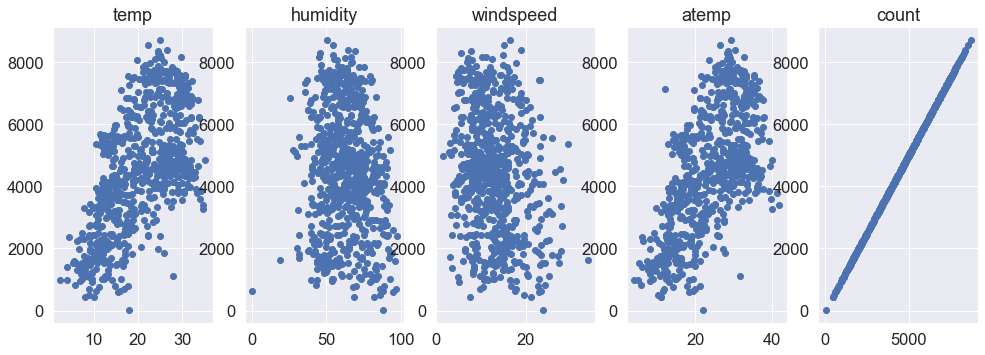

In [47]:
import scipy.stats

plt.figure(figsize=(20, 12))

i=1
for col in numerical_cols:
            plt.subplot(2,6,i)
            plt.scatter(x=df[col],y=df['count'])
            plt.title(col)
            i = i + 1
plt.show()


### Conclusion:
1. There is positive relation betwwen tempr, atempr, casual, registered and booking counts. 

2. Model will decide if rest of the features should be included as they seem to have no or little relation to bookings.

### Pairplot - Comparison of categorical vs numerical features 


In [48]:
# Some important numerical cols for analysis:
col_list=['temp','atemp', 'humidity','windspeed', 'count']
# df.columns
col_list

['temp', 'atemp', 'humidity', 'windspeed', 'count']

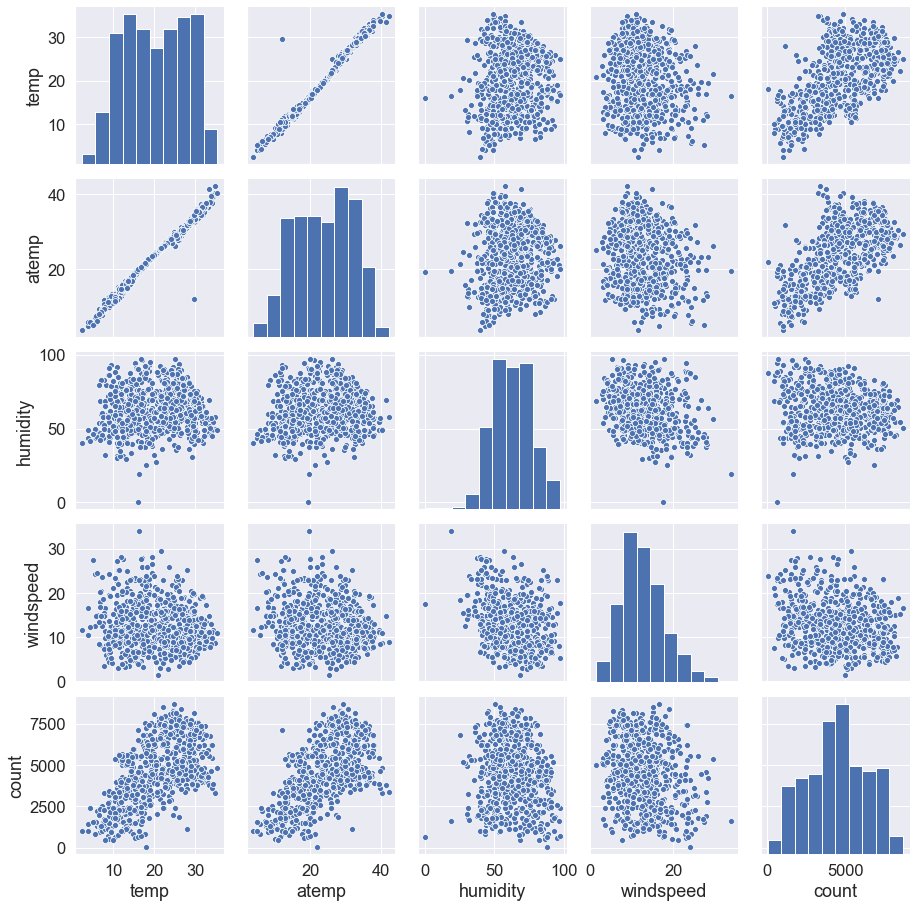

In [49]:

#Pairplot for important variables
df_new = df[col_list]
sns.pairplot(df_new, vars=col_list)
plt.show()




### Conclusion: - 
The pairplot tells us that there is a positive linear relation between variables. 
- 'tempr' has positive correlation with 'casual','registered', 'bookings'  
- tempr and atempr are correlated
-  count is positively correlated with temp, atemp, casual and registered

    

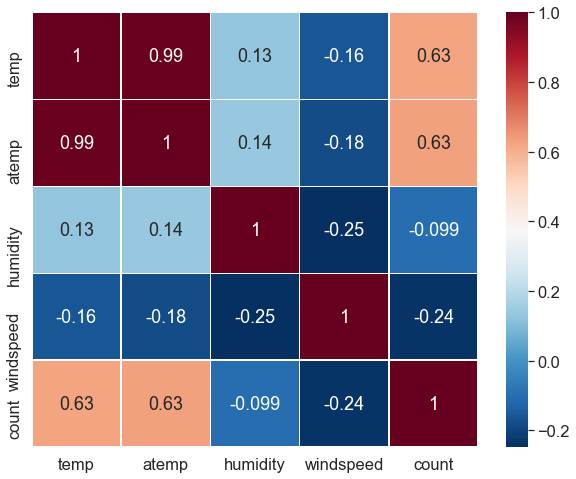

In [50]:
# find correlation using heatmap
plt.figure(figsize=(10, 8))
df_features=df[col_list]
pearsoncorr = df_features.corr(method='pearson')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()




### Conclusion
1. A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
2. A co-efficient close to -1 means that there’s a very strong negative correlation between the two variables.
3. In our case, the maroon shows very strong positive correlations. >= 0.50
4. In our case, the dark blue shows very strong negative correlations <=0



- Here we can remove one of these variables without much impact on the model.
1. windspeed is negatively correlated to almost every feature.
2. registered and count are highly positively correlated.
3. temp and atemp are highly positively correlated.

In [51]:
df.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'season_2', 'season_3', 'season_4', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [52]:
df['count'].dtype

dtype('int64')

### 2. Weekly bookings for weekdays, weekends and holidays 


In [53]:
df.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'season_2', 'season_3', 'season_4', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [54]:

# # print(df.columns)
# cols_plot=['weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6','holiday','workingday','dateday']
# df_daily=df[cols_plot]
# df_daily.sort_values(by='dateday', ascending=True,inplace=True)

# #convert from datetime64[ns] to DatetimeIndex
# df_daily['dateday'] = df_daily['dateday'].astype(np.datetime64)
# # print(df_daily.dtypes)

# df_daily.set_index('dateday', inplace=True)
# # print(df_daily.index.dtype)
# df_daily.index[0:10]

# i=1
# for col in cols_plot:
#     if col != 'dateday':
#         fig, ax = plt.subplots(figsize=(30,10))
#         sns.lineplot(x=df_daily.index, y=df_daily[col],ax=ax).set_title("Daily Trend of "+col)
#         i=i+1
# plt.show()

 

### Conclusion:
Now we can clearly see the weekly oscillations. 

There is decrease in booking in Monday and Tuesday.

It may also be due to the holidays during Dec and Jan.

In [55]:
df.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'season_2', 'season_3', 'season_4', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [56]:
df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Heatmap to see correlation between all variables


In [57]:
scaling_num_cols=[ 'year', 'holiday', 'workingday', 'temp', 'atemp','count',
       'humidity', 'windspeed',  
        'season_2', 'season_3', 'season_4'
       , 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
        'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6',
        'weathersit_2','weathersit_3']

In [58]:
df.shape

(730, 30)

# Create Model

In [59]:
df=bike_new.copy()

In [60]:

# find features that have a correlation higher than 0.6
corr = df.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.6:
            if columns[j]:
                columns[j] = False
                print(corr.columns[i],',',corr.columns[j],'=',corr.iloc[i,j])

workingday , weekday_6 = -0.6086821299883264
temp , atemp = 0.9916961786905649
temp , count = 0.6270440344135152
temp , season_3 = 0.678282985274809


### Conclusion:

We can identify all cols which are  multicollinear in nature, and which variable have high collinearity with the target variable. There is still large patch of month and weekday cols portion of which we can remove. we will decide these cols during further steps. 

We use the plot to validate different correlated values along with VIF & p-value for feature selection.


High correlation columns which we can drop later are shown:<br/>
workingday , weekday_6 = -0.6086821299883264<br/>
temp , atemp = 0.9916961786905649<br/>
temp , count = 0.6270440344135152<br/>
temp , season_3 = 0.678282985274809<br/>

In [61]:
df.shape

(730, 30)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   humidity      730 non-null    float64
 6   windspeed     730 non-null    float64
 7   count         730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  month_2       730 non-null    uint8  
 12  month_3       730 non-null    uint8  
 13  month_4       730 non-null    uint8  
 14  month_5       730 non-null    uint8  
 15  month_6       730 non-null    uint8  
 16  month_7       730 non-null    uint8  
 17  month_8       730 non-null    uint8  
 18  month_9       730 non-null    

In [63]:
#  Encode the Categorical Variable


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
df.iloc[:,0] = label_encoder.fit_transform(df.iloc[:,0]).astype('float64')


In [64]:
selected_columns = df.columns
selected_columns


Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'season_2', 'season_3', 'season_4', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

# Split into train-test

In [65]:
from sklearn.model_selection import train_test_split

# random_state so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7,test_size = 0.30, random_state = 333)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [66]:


# Checking the values before scaling
df_train.head()
df_train.columns
df_train.describe()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          510 non-null    float64
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   humidity      510 non-null    float64
 6   windspeed     510 non-null    float64
 7   count         510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  month_2       510 non-null    uint8  
 12  month_3       510 non-null    uint8  
 13  month_4       510 non-null    uint8  
 14  month_5       510 non-null    uint8  
 15  month_6       510 non-null    uint8  
 16  month_7       510 non-null    uint8  
 17  month_8       510 non-null    uint8  
 18  month_9       510 non-null  

# Scaling


scale the numerical cols by Min-Max scaling (Normalisation) to fit all numerical values Between 0 and 1


It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

There are two common ways of rescaling:
    - Min-Max scaling (Normalisation):Between 0 and 1
    - Standardisation :mean-0, sigma-1


In [67]:
df_train.shape

(510, 30)

In [68]:
df_test.shape

(219, 30)

In [69]:
df.shape

(730, 30)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          730 non-null    float64
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   humidity      730 non-null    float64
 6   windspeed     730 non-null    float64
 7   count         730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  month_2       730 non-null    uint8  
 12  month_3       730 non-null    uint8  
 13  month_4       730 non-null    uint8  
 14  month_5       730 non-null    uint8  
 15  month_6       730 non-null    uint8  
 16  month_7       730 non-null    uint8  
 17  month_8       730 non-null    uint8  
 18  month_9       730 non-null    

In [71]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

#Instantiate an object
scaler = MinMaxScaler()

display(df_train.head())

print(df_train.columns)

num_cols = ['temp', 'atemp', 'humidity', 'windspeed','count']
#Fit on data
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

display(df_train.head())
#Checking numeric variables(min and max) after scaling - 0 and 1
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1.0,0,1,18.791653,22.50605,58.7083,7.832836,6304,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
650,1.0,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
212,0.0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
714,1.0,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
8,0.0,0,1,5.671653,5.80875,43.4167,24.250650,822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'season_2', 'season_3', 'season_4', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')


,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1.0,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
650,1.0,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
212,0.0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
714,1.0,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
8,0.0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,0.241176,0.082353,0.078431,0.084314,0.092157,0.072549,0.078431,0.098039,0.082353,0.084314,0.086275,0.076471,0.143137,0.152941,0.131373,0.139216,0.147059,0.143137,0.341176,0.025490
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,0.428217,0.275172,0.269113,0.278131,0.289531,0.259649,0.269113,0.297660,0.275172,0.278131,0.281045,0.266010,0.350557,0.360284,0.338139,0.346511,0.354512,0.350557,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


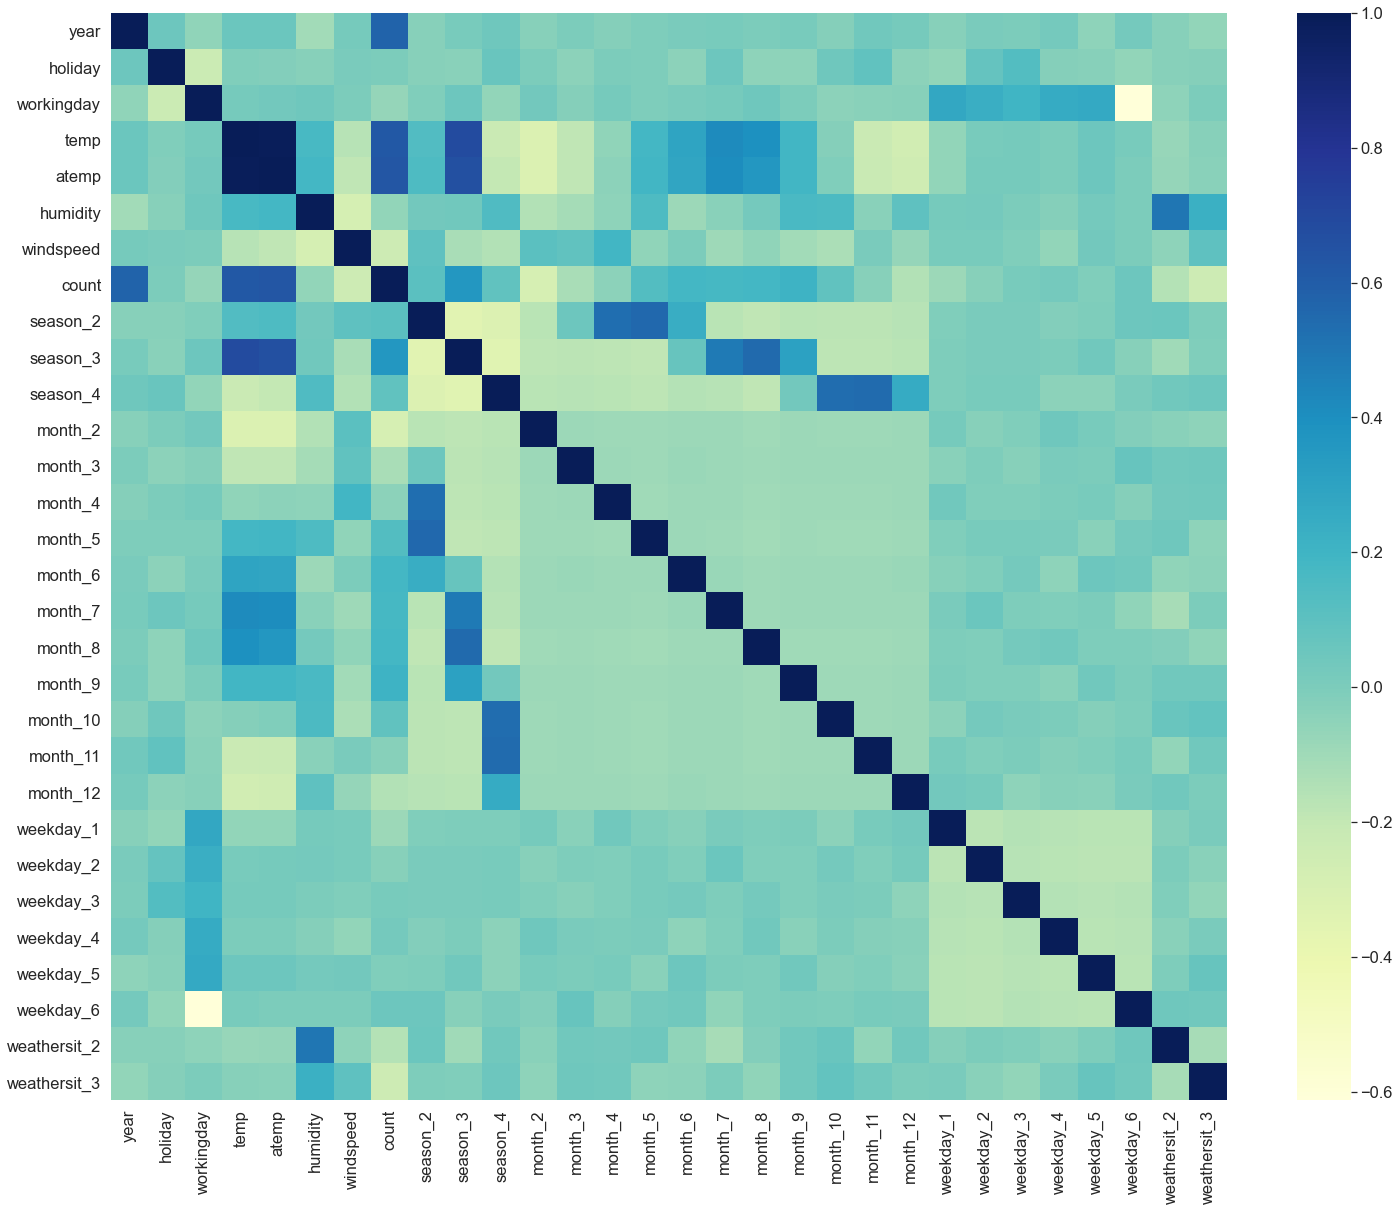

In [72]:

plt.figure(figsize=(25, 20))
sns.heatmap(df_train.corr(),cmap='YlGnBu',annot = False)
plt.show()

### Conclusion:
All the numeric variables are now mapped between 0 and 1

Multicollinearity: Assumes that predictors are not correlated with each other. If there is correlation among the predictors

Let's check the correlation coefficients to see which variables are highly correlated after scaling
Little to no multicollinearity among predictors

Multicollinearity: Assumes that predictors are not correlated with each other. 

If there is correlation among the predictors of the target variables.

correlation coefficients to see which variables are highly correlated after scaling

From the heatmap we can see temp, year are correlated to the 'count' variable. 

Even in August, September months we can see the counts are little high.


# Dividing into X and Y sets for the model building¶


In [73]:

# Dividing into X and Y sets for the model building = target variable = booking count
y_train = df_train.pop('count')
X_train = df_train

print('Done')

Done


#  RFE - Recursive Feature Elimination


We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

Running RFE with the output number of the variable equal to no of df cols = 15

For each step we inspect the features high p-value > 0.05 as these are statistically insignificant features. Features with High VIF > 10 are highly multicollinear features which can be removed.


In [74]:
 len(df.columns)

30

In [75]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [76]:
X_train.shape

(510, 29)

In [77]:
# Running RFE with the output variables equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print('Done')

Done


In [78]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('year', True, 1),
 ('holiday', False, 11),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('month_2', False, 10),
 ('month_3', True, 1),
 ('month_4', False, 8),
 ('month_5', False, 6),
 ('month_6', False, 7),
 ('month_7', False, 15),
 ('month_8', False, 9),
 ('month_9', True, 1),
 ('month_10', True, 1),
 ('month_11', False, 12),
 ('month_12', False, 13),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', False, 2),
 ('weekday_4', False, 4),
 ('weekday_5', False, 3),
 ('weekday_6', False, 14),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [79]:
#Columns where RFE support is True are selected
col = X_train.columns[rfe.support_]
col

Index(['year', 'temp', 'atemp', 'humidity', 'windspeed', 'season_2',
       'season_3', 'season_4', 'month_3', 'month_9', 'month_10', 'weekday_1',
       'weekday_2', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [80]:
#Columns where RFE support is False are not selected
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'month_2', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_11', 'month_12', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

# Run the linear model 

1. Checking VIF : 

    - Variance Inflation Factor or VIF, shows how much the feature variables are correlated with each other. 
    - The formula for calculating VIF is:VIFi=1/(1−Ri2)
    - If a VIF is > 10, model have high multicollinearity.
    - High multicollinearity between two variables indicates either of the features cannot be included in the model.
    - We can also lookup heatplot and pairplot and remove columns with very high VIF, as it is insignificant.


2. Checking the p-value

   - Assumption:
H0 = Selected combination of dependent variables do not have any effect on the independent variables

    - The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that we can reject the null hypothesis.
    - The regression output  predictor variables are statistically significant because their p-values equal 0.000. 
    - On the other hand, feature is not statistically significant because its p-value > 0.05.
    - Keeping variables that are not statistically significant can reduce the model’s precision.
    - Hence we can remove such features which have p-value > 0.05.


3. Check effect of feature on p-value todrop columns
    - Build regression model using variables    
    - Calculate the p values for these variables, a high p-value( p-value > 0.05) indicates that the feature is insignificant. Insignificant features may cause bias in the model, hence should be discarded.
    - Also verify that the VIF is within range(VIF> 10) indicates that the feature has high multicollinearity with other variables
    - If the p values is higher than 0.05 threshhold or VIF is higher than 10, we discard that combination of features,  and rebuild the model.


4. Steps:

All columns have VIF < 10 since we have removed the highly correlated values using the heatmap. 
So we have to only check for high p-values (p-value > 0.05) 


#### What is meaning of p-value : 
https://www.simplypsychology.org/p-value.html

In [81]:
#Initial Model -1 
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [82]:
# VIF check : Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,386.08
2,atemp,364.04
3,humidity,16.13
6,season_3,7.11
4,windspeed,4.51
5,season_2,3.54
7,season_4,3.02
13,weathersit_2,2.15
0,year,2.02
10,month_10,1.66


In [83]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()
# Check the parameters obtained

lr1.params

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.36e-185
Time:                        19:46:42   Log-Likelihood:                 506.80
No. Observations:                 510   AIC:                            -981.6
Df Residuals:                     494   BIC:                            -913.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2380      0.028      8.437   

In [84]:
#Drop atemp due to high p-value and high VIF and rebuild model
X_train_new = X_train_rfe.drop(['atemp'], axis=1)


In [85]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,23.19
2,humidity,15.85
5,season_3,7.03
3,windspeed,4.35
4,season_2,3.54
6,season_4,3.01
12,weathersit_2,2.14
0,year,2.02
9,month_10,1.66
8,month_9,1.28


In [86]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
# Check the parameters obtained

lr2.params

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.20e-186
Time:                        19:46:43   Log-Likelihood:                 506.59
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     495   BIC:                            -919.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2393      0.028      8.509   

In [87]:
#Drop humidity due to high VIF and rebuild model. 
# Note temp also has high VIF but we know that we need it for the model so we retain temp.

X_train_new = X_train_new.drop(["humidity"], axis = 1)

In [88]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,15.20
4,season_3,6.69
2,windspeed,3.89
3,season_2,3.51
5,season_4,2.89
0,year,2.01
8,month_10,1.66
11,weathersit_2,1.51
7,month_9,1.27
10,weekday_2,1.21


In [89]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Check the parameters obtained

lr3.params


const           0.141684
year            0.232973
temp            0.446142
windspeed      -0.146573
season_2        0.134285
season_3        0.093151
season_4        0.149627
month_3         0.054857
month_9         0.092169
month_10        0.054644
weekday_1      -0.027920
weekday_2      -0.039708
weathersit_2   -0.076113
weathersit_3   -0.323355
dtype: float64

In [90]:
# Drop season_3 and rebuild model
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [91]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.05
2,windspeed,3.72
0,year,2.00
4,season_4,1.94
7,month_10,1.63
3,season_2,1.56
10,weathersit_2,1.50
6,month_9,1.23
9,weekday_2,1.21
8,weekday_1,1.18


In [92]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Check the parameters obtained

lr4.params

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.66e-180
Time:                        19:46:43   Log-Likelihood:                 486.48
No. Observations:                 510   AIC:                            -947.0
Df Residuals:                     497   BIC:                            -891.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1252      0.018      6.828   

In [93]:
# Drop month_10 and rebuild model

X_train_new = X_train_new.drop(["month_10"], axis = 1)

In [94]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,temp,3.95
2,windspeed,3.68
0,year,1.99
3,season_2,1.56
9,weathersit_2,1.50
4,season_4,1.38
8,weekday_2,1.21
6,month_9,1.20
7,weekday_1,1.18
5,month_3,1.14


In [95]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Check the parameters obtained

lr5.params


# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.60e-180
Time:                        19:46:44   Log-Likelihood:                 483.73
No. Observations:                 510   AIC:                            -943.5
Df Residuals:                     498   BIC:                            -892.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1230      0.018      6.684   

In [96]:
# Drop month_3 and rebuild model

X_train_new = X_train_new.drop(["month_3"], axis = 1)

In [97]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.92
2,windspeed,3.54
0,year,1.98
3,season_2,1.56
8,weathersit_2,1.48
4,season_4,1.36
7,weekday_2,1.21
5,month_9,1.19
6,weekday_1,1.18
9,weathersit_3,1.07


In [98]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Check the parameters obtained

lr6.params

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.51e-180
Time:                        19:46:44   Log-Likelihood:                 480.10
No. Observations:                 510   AIC:                            -938.2
Df Residuals:                     499   BIC:                            -891.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1336      0.018      7.391   

In [99]:
# Drop weekday_1 and rebuild model

X_train_new = X_train_new.drop(["weekday_1"], axis = 1)

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# Add a constant
X_train_lm8 = sm.add_constant(X_train_new)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

# Check the parameters obtained

lr8.params

# Print a summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     254.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.62e-180
Time:                        19:46:44   Log-Likelihood:                 477.53
No. Observations:                 510   AIC:                            -935.1
Df Residuals:                     500   BIC:                            -892.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1269      0.018      7.091   


### Conclusion: - 

The VIFs and p-values both are within an acceptable range. 

The model has very low multicollinearity(VIF < 10) between the predictors.

Also the p-values(p_value <0.05) for all the predictors are significant.

So this our final model and we can make our predictions using this model.

We can rebuild model if test data values are different. 



#### We define the Null Hypothesis as:
- H0:B1=B2=...=Bn=0
- H1:at least one Bi!=0



lr8 model coefficient values:

 const = 0.1269  
 year =  0.2310  
 temp =  0.5628  
 windspeed = -0.1537  
 season_2 =   0.0823  
 season_4 =   0.1270  
 month_9 = 0.0958  
 weekday_2 = -0.0331  
 weathersit_2 = -0.0732  
weathersit_3 = -0.3050   

A positive coefficient value indicated that a unit increase in temp variable, increases the bookings counts by "coeff" units.

    
A negative coefficient value indicated that a unit increase in temp variable, decreases bookings counts by "coeff" units.

const means even if other vars are not there min bookings will happen.
    
    
#### Note:
As coefficients are not 0, so we reject the null hypothesis H0.

# F Statistics
 F-statistic:                     254.3
 
 Prob (F-statistic):          2.62e-180

The F-Statistics value is greater than 1 and the p-value is 0 , so indicates that the overall model is significant 


# Best line fit equation =  
count = const *0.1269  + year *  0.2310  + temp *  0.5628  -windspeed * 0.1537   + season_2 *   0.0823   + season_4 *  0.1270  + month_9 * 0.0958  -weekday_2 * 0.0331   -weathersit_2 * 0.0732  -weathersit_3 * 0.3050 

# Validate model Residual analysis of train data

### 1. Error terms are normally distributed with mean zero (not X, Y)

    Residual Analysis Of Training Data


Text(0.5, 0, 'Errors')

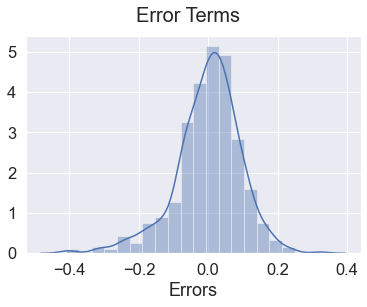

In [100]:
y_train_pred = lr8.predict(X_train_lm8)
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

From the above histogram, we could see that the error terms are normally distributed. Hence our assumption for Linear Regression is valid.


In [101]:

### 2. There is a linear relationship between X and Y


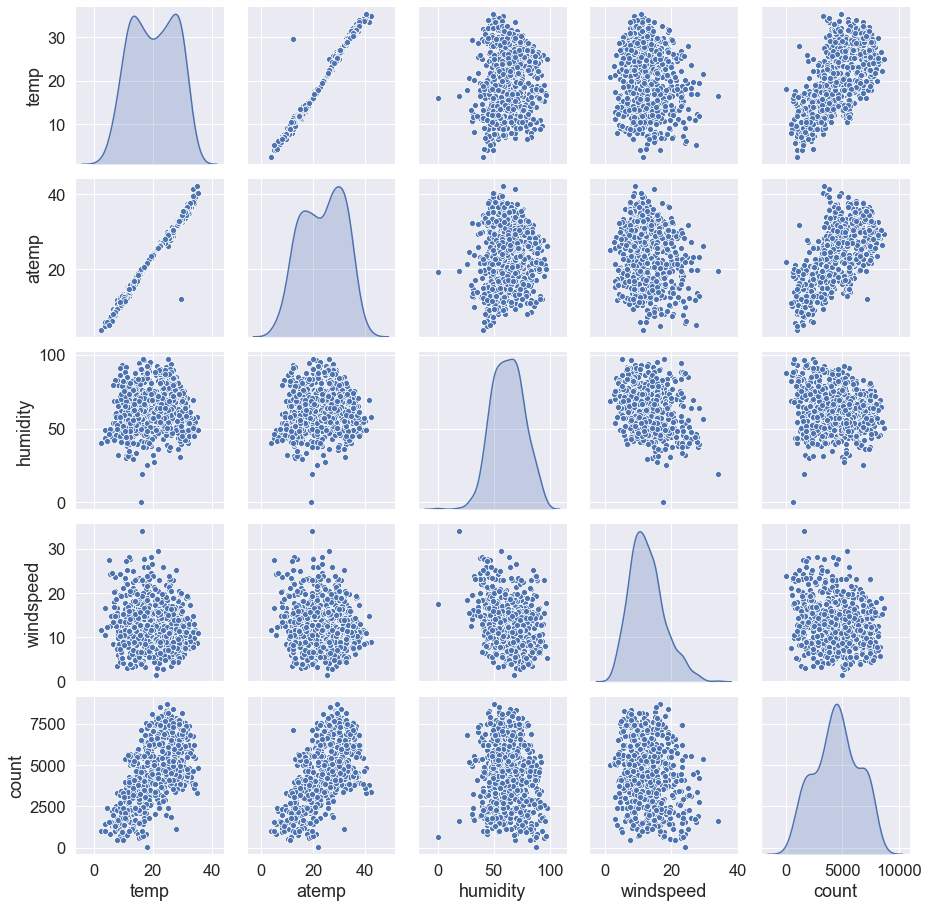

In [102]:
bike_num=bike_new[[ 'temp', 'atemp', 'humidity', 'windspeed','count']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()


 ### Conclusion:

Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.



### 3. There is No Multicollinearity between the predictor variables




In [103]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.89
2,windspeed,3.46
0,year,1.98
3,season_2,1.56
7,weathersit_2,1.48
4,season_4,1.36
5,month_9,1.19
6,weekday_2,1.18
8,weathersit_3,1.07


### Conclusion : 

From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 10.


# Make predictions

making predictions using the final model (lr8)

In [104]:


# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.689498,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,0.251142,0.059361,0.100457,0.077626,0.068493,0.105023,0.100457,0.054795,0.082192,0.086758,0.073059,0.105023,0.146119,0.123288,0.168950,0.150685,0.132420,0.141553,0.324201,0.036530
std,0.501098,0.198967,0.463759,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,0.434663,0.236840,0.301297,0.268194,0.253169,0.307285,0.301297,0.228100,0.275286,0.282125,0.260830,0.307285,0.354034,0.329520,0.375566,0.358561,0.339723,0.349389,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:

#Dividing into X_test and y_test
y_test = df_test.pop('count')
X_test = df_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          219 non-null    float64
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   humidity      219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  month_2       219 non-null    uint8  
 11  month_3       219 non-null    uint8  
 12  month_4       219 non-null    uint8  
 13  month_5       219 non-null    uint8  
 14  month_6       219 non-null    uint8  
 15  month_7       219 non-null    uint8  
 16  month_8       219 non-null    uint8  
 17  month_9       219 non-null    uint8  
 18  month_10      219 non-null   

In [106]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)

X_test_lm8.info()

# Making predictions using the final model (lr6)

y_pred = lr8.predict(X_test_lm8)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   year          219 non-null    float64
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   month_9       219 non-null    uint8  
 7   weekday_2     219 non-null    uint8  
 8   weathersit_2  219 non-null    uint8  
 9   weathersit_3  219 non-null    uint8  
dtypes: float64(4), uint8(6)
memory usage: 9.8 KB


In [107]:
# RMSE 
from sklearn import metrics              
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.09638973115793409


### Conclusion
RMSE values between 0.2 and 0.5 are generally acceptable. High RMSE value indicates this model may not be able to predict accuately. We will further decide based on R^2 values.

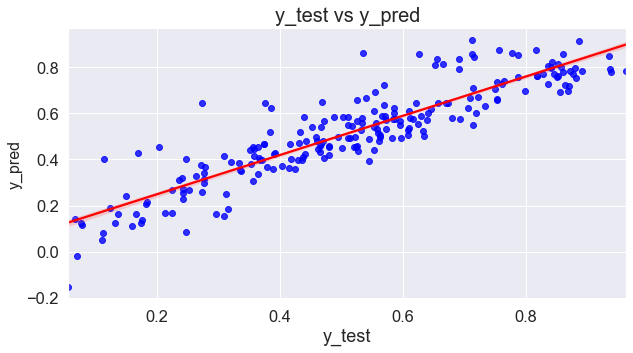

In [108]:
# Plotting y_test and y_pred to understand the spread.

# Visualising the fit on the test set
#Regression plot
plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                      
plt.ylabel('y_pred', fontsize=16)                      
plt.show()

# Validate the predictions

# R squared and Adjusted R squared for Test 

In [109]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.8070747656579398

In [110]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables
n = X_test.shape[0]
p = X_test.shape[1]
Adj_r2=1-(1-r2)*(n-1)/(n-p-1)
print(Adj_r2)

0.7987669804470376


### Conclusion:
- Train R^2 :0.821
- Train Adjusted R^2 :0.818
- Test R^2 :0.8070747656579398 
- Test Adjusted R^2 :0.7987669804470376

Difference in adjusted R^2 between Train and test: = 2% which is less than 5%.

Hence this is a fairly good model for represent the datasets. 



# Interpretation of Model:
- We can see that temp variable has the highest coefficient 0.5628, which means if the temp increases by one unit the count of bookings decreases by 0.5628 units.

1. Some variables have positive coefficients. 

2. Some variables have negative coefficient. 
    - This suggests that as the independent variable increases, the dependent variable tends to decrease. 
    - Features : windspeed, weekday_2,weathersit_2,weathersit_3 variables with negative coefficient.
    - The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.


3. The top 5 predictor variables that influences the bookings and should be considered while planning are.
    - Temperature (temp) 
    - Weather Situation 3 (weathersit_3) 
    - Year (yr) 
    - season_4
    - month_9


# Business inferences:



- There is negative demand in Dec and early Jan. It may be probably due to vacations. 
- Registered users are higher in Dec-Jan than casual users which is as expected. 
- Registered user count is quite consistent  more or less throughout the year.
- Company may think of some membership perks/packages/discounts in Dec-Feb when casual user counts are low.
- Arrange discounted/free membership passes for regular users who have completed certain no of days.
- Accrue points on kms travelled, and redeem them for specific hours at the end of month.
- Casual user count is low during Dec-Feb, which may be due to vacations or weather(misty) days. So company can think of some family discounts like one-ride-free if possible 
- Provide free rides for a few minutes daily for the first few users on first-come-first-serve basis.
- Company can target certain age group like kids between 8-12 years and give them free test rides.
- If possible they can decide to provide facilities like pick-up bikes from the center and drop at any other center on the way.
- If possible arrange indoor tracks or other indoor bikes during light snow. 
- Arrange drives/posters to convince users of the cleanliness and safety precautions taken for COVID situation.
- Provide packages for COVID healthcare workers/volunteers.

